## Question 1 - Grayscaled Edge Detection

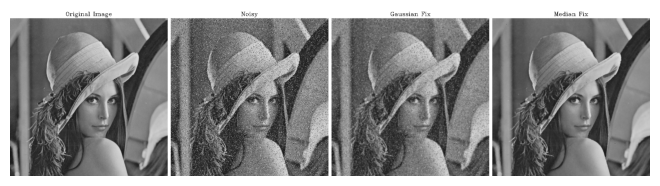

In [ ]:
# ================= This is done because all code files are stored inside 'code', harms intellisense though :(
#                   This is because we can't import a package from within jupyter(at least, I couldn't make it work)
import sys
sys.path.append("./code")
# =================

import cv_utils
from salt_and_pepper_noise import add_salt_and_pepper_noise
import cv2

OUTPUT_PATH = "output_images/q1"

img = cv2.imread("input_images/Lenna.png", cv2.IMREAD_GRAYSCALE)
noise_image = add_salt_and_pepper_noise(img)

gaussian_fix = cv2.GaussianBlur(noise_image, (5, 5), 1)
median_fix = cv2.medianBlur(noise_image, 3)

cv_utils.display_images_notebook( \
    titles=["Original Image", "Noisy", "Gaussian Fix",  "Median Fix"], \
    images=[img, noise_image, gaussian_fix, median_fix] \
)
outputs = {
    "Noisy Image": noise_image,
    "Gaussian Fix": gaussian_fix,
    "Median Fix": median_fix
}
for image_name, image in outputs.items():
    cv_utils.save_image(image, f"{OUTPUT_PATH}/{image_name}.png")

### Example results

![Edge detection example](example_images/q1/lenna_edges.png)

### Explanation

The filter provided,
\begin{bmatrix}
-1 & -2 & -1 \\
 0 &  0 &  0 \\
 1 &  2 &  1
\end{bmatrix}
Is a vertical edge detection filter. It detects changes in pixel intensity.

So, how does it work?
* Convolution: We slide the filter over the image pixel by pixel, evaluating the weighted sum of the surrounding 3x3 pixels.
    * The values in the filter matrix determine the weight of each pixel surrounding, including, the current pixel.
* When there's a change in vertical intensity in a local region, the weighted sum will be large(in magnitude), resulting in higher intensity edges in the output.
* When a local region has no change in vertical intensity (a uniform region), the weighted sum will be zero/close to zero, resulting in lower intensity in the output.
* Normalization: The result of the convolution might produce values that are negative, or exceeding 8bits(255). So we normalize the output image so every pixel's brightness will make sense- as an unsigned 8bit intensity value.
In this example, we emphasize positive values- transitions from lower intensities to higher intensities.

## Question 4 - DFT properties

Need to prove: $(A \ominus B) \ominus C = A \ominus (B \oplus C)$

From the duality, we know that
$$(A \ominus B)^{C}\overset{(1)}{=}\left( A^{C} \oplus \widehat{B} \right) \Longleftrightarrow (A \ominus B)\overset{(2)}{=}\left( A^{C} \oplus \widehat{B} \right)^{C}$$

We also know that dilation is associative(3).

And so,

\begin{align*}
(A \ominus B) \ominus C &\overset{(2)}{=} \left( (A \ominus B)^{C} \oplus \widehat{C} \right)^{C} \\
&\overset{(1)}{=} \left( \left( A^{C} \oplus \widehat{B} \right) \oplus \widehat{C} \right)^{C} \\
&\overset{(3)}{=} \left( A^{C} \oplus \left( \widehat{B} \oplus \widehat{C} \right) \right)^{C} \\
&\overset{(2)}{=} \left( A \ominus \widehat{\left( \widehat{B} \oplus \widehat{C} \right) } \right) \\
&= A \ominus (B \oplus C)
\end{align*}



As required.